# cpolypy: Simple methods for handling convex polygons

## Abstract
The goal of this project was building a software library on Python for handling convex polygons. A simple `cpolypy` library was developed based on the specifications. It is hosted on [GitHub](https://github.com/andbamp/cpolypy).

## Setup
The library can be installed as follows. More detailed instructions can be found on the GitHub repository.

```bash
python setup.py bdist_wheel
pip install -e .
```

- To import `cpolypy`:

In [1]:
import cpolypy as cp

- `numpy` is also required, as the NumPy array data structure is used to signify 2D points.

In [2]:
import numpy as np

- Finally, `matplotlib` is used for the purpose of this report to visualize the library's outputs and `time` is used for time measurements.

In [3]:
import matplotlib.pyplot as plt
import time

## Usage examples
### Finding the convex hull from points
#### Introduction

- The _Graham's scan_ algorithm was implemented. Data structures and linear algebra operations from the `numpy` were used, with the NumPy array serving as the data structure used to signify two-dimensional points. Implementation sensibilities related to vectorization were taken into account.
- A simple demonstration calculating the convex hull of point cloud composed of 100 points follows.

In [4]:
point_cloud = np.random.rand(100, 2)
chull = cp.convex_hull_from_points(point_cloud)

- The following graph displays the points along with the convex polygon formed by them.

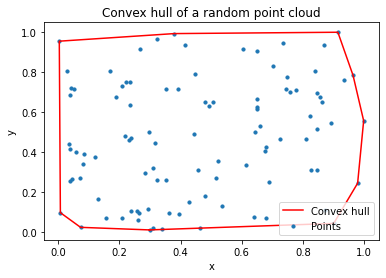

In [5]:
def draw_cloud(points, axis, size = 1, color = None, lab = "Points"):
  axis.scatter(points[:,0], points[:,1], s = size, c = color, label = lab)

def draw_chull(chull, axis, style = '-', lab = "Convex hull"):
  vertices = np.vstack((chull.vertices, chull.vertices[0]))
  axis.plot(vertices[:,0], vertices[:,1], style, label = lab)

def draw_plot(x_lab, y_lab, title):
  plt.xlabel(x_lab)
  plt.ylabel(y_lab)
  plt.title(title)
  plt.legend(loc = "lower right")
  plt.show()

draw_cloud(point_cloud, plt, 10)
draw_chull(chull, plt, 'r')
draw_plot("x", "y", "Convex hull of a random point cloud")

#### Usage examples

In [6]:
def rand_triangle(num_points, size = 1, center = [0,0]):
  vert = np.random.rand(3,2)
  x, y = 2 * size * np.random.rand(num_points), 2 * size * np.random.rand(num_points)
  q = np.abs(x - y)
  s, t, u = q, 0.5 * (x + y - q), 1 - 0.5 * (x + y + q)
  points = np.empty([num_points,2])
  points[:,0] = s * vert[0,0] + t * vert[1,0] + u * vert[2,0]
  points[:,1] = s * vert[0,1] + t * vert[1,1] + u * vert[2,1]
  return(points + center)

def rand_circle(num_points, size = 1, center = [0,0]):
  theta = 2*np.pi * np.random.rand(num_points)
  dist = size * np.sqrt(np.random.rand(num_points))
  points = np.empty([num_points,2])
  points[:,0] = dist * np.cos(theta)
  points[:,1] = dist * np.sin(theta)
  return(points + center)

def rand_cloud(num_points, num_circles = 1, num_triangles = 1):
  num_points = int(num_points / (num_circles + num_triangles))
  points = np.empty([0,2])
  for i in range(num_circles):
    rand_size = np.random.randint(1,5)
    rand_center = (10 * np.random.rand(1,2)).tolist()[0]
    points = np.vstack([points, rand_circle(num_points, rand_size, rand_center)])
  for i in range(num_triangles):
    rand_size = np.random.randint(1,10)
    rand_center = (10 * np.random.rand(1,2)).tolist()[0]
    points = np.vstack([points, rand_triangle(num_points, rand_size, rand_center)])
  return(points)

- Using `numpy` 9 different random point cloud settings will be created to test the library.
- Each one is displayed on the graph bellow.

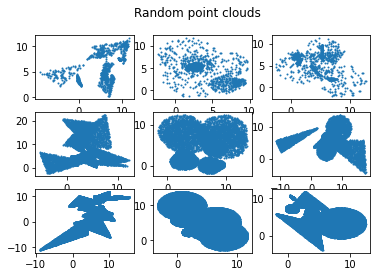

In [7]:
point_clouds = [[],[],[]]
point_clouds[0].append(rand_cloud(1000, 0, 10))
point_clouds[0].append(rand_cloud(1000, 10, 0))
point_clouds[0].append(rand_cloud(1000, 5, 5))
point_clouds[1].append(rand_cloud(10000, 0, 10))
point_clouds[1].append(rand_cloud(10000, 10, 0))
point_clouds[1].append(rand_cloud(10000, 5, 5))
point_clouds[2].append(rand_cloud(100000, 0, 10))
point_clouds[2].append(rand_cloud(100000, 10, 0))
point_clouds[2].append(rand_cloud(100000, 5, 5))

figure, axis = plt.subplots(3, 3)
for i in range(len(point_clouds)):
  for j in range(len(point_clouds[i])):
    draw_cloud(point_clouds[i][j], axis[i,j])
plt.suptitle("Random point clouds")
plt.show()

- Random point clouds within triangles, circles and triangle/circle combinations are displayed on each column respectively.
- The number of points and shapes of each point cloud increase accordingly by row, with the first one having 1,000, the second 10,000 and the third one 100,000.
- The convex hull of each point cloud will be calculated.

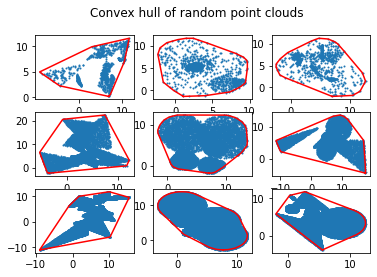

In [8]:
chulls = [[], [], []]
chull_res = [[], [], 3*[*['triangles', 'circles', 'combination']]]
for i in range(len(point_clouds)):
  for j in range(len(point_clouds[i])):
    chulls[i].append(cp.convex_hull_from_points(point_clouds[i][j]))

figure, axis = plt.subplots(3, 3)
for i in range(len(point_clouds)):
  for j in range(len(point_clouds[i])):
    draw_cloud(point_clouds[i][j], axis[i,j])
    draw_chull(chulls[i][j], axis[i,j], 'r')
plt.suptitle("Convex hull of random point clouds")
plt.show()

#### Time measurements
- A rough estimation of the performance of the implementation follows.

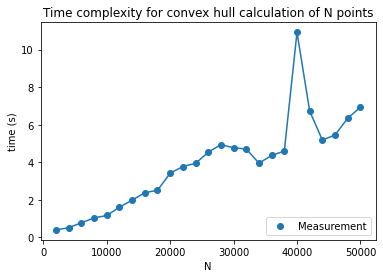

In [9]:
timing_res = np.empty([25, 2])
for i in range(timing_res.shape[0]):
  num_points = 2000 * (i + 1)
  points = rand_circle(num_points)
  start = time.time()
  cp.convex_hull_from_points(points)
  stop = time.time() - start
  timing_res[i,0] = num_points
  timing_res[i,1] = stop

plt.scatter(timing_res[:,0], timing_res[:,1], label = "Measurement")
plt.plot(timing_res[:,0], timing_res[:,1])
draw_plot("N", "time (s)", "Time complexity for convex hull calculation of N points")

- The time complexity of the implementation appears to be nearly linear. More formal testing for larger number of operations may indicate it to be $ O(n log(n)) $, which is consistent with the literature with respect to convex hull calculation via the _Graham's scan_ algorithm.

### Point in convex polygon
#### Introduction
- Point inclusion in a convex polygon is tested via a simple counterclockwise turn test. Note that the specifications imply a simple single-input-single-output, so no vectorization of the implementation was considered.
- A simple demonstration for a few points follows.

In [10]:
cpoly = cp.Polygon(np.array([[-1,-2], [1,-1], [0,2], [-2, -1]]))
points = np.array([[0, 0.5], [3, 1], [-1, -1], [1, 2]])
points_in = []
points_out = []
for point in points:
  pip = cp.point_is_in_polygon(point, cpoly)
  if(pip): points_in.append(point)
  else: points_out.append(point)
points_in = np.array(points_in)
points_out = np.array(points_out)

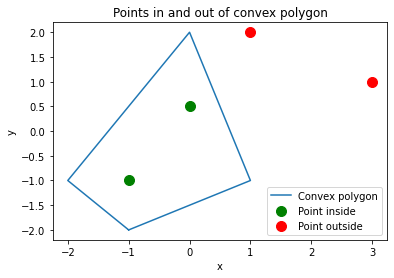

In [11]:
draw_chull(cpoly, plt, lab = "Convex polygon")
draw_cloud(points_in, plt, 100, 'g', "Point inside")
draw_cloud(points_out, plt, 100, 'r', "Point outside")
draw_plot("x", "y", "Points in and out of convex polygon")

- Points inside the convex polygon are marked green, while the rest are red.

#### Usage examples

In [12]:
def points_in_polygon(points, cpoly):
  points_in = []
  points_out = []
  for point in points:
    pip = cp.point_is_in_polygon(point, cpoly)
    if(pip): points_in.append(point)
    else: points_out.append(point)
  return(np.array(points_in), np.array(points_out))

cpoly = cp.Polygon(np.array([[4,0], [5,2], [2,6], [1,1]]))
point_clouds = [rand_cloud(10000, 100, 100), rand_cloud(1000), rand_cloud(1000, 10, 10)]
points_in_clouds = []
points_out_clouds = []
for points in point_clouds:
    points_in, points_out = points_in_polygon(points, cpoly)
    points_in_clouds.append(points_in)
    points_out_clouds.append(points_out)

- Once again, the implementation is tested under a few different point cloud settings.

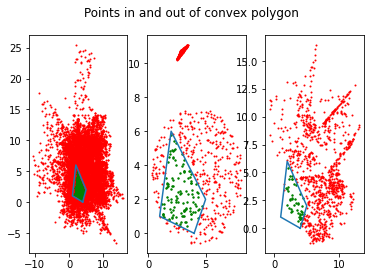

In [13]:
figure, axis = plt.subplots(1, 3)
for i in range(len(point_clouds)):
  draw_chull(cpoly, axis[i], lab = "Convex polygon")
  if(points_in_clouds[i].shape[0] > 0): draw_cloud(points_in_clouds[i], axis[i], 2, 'g', "Point inside")
  if(points_out_clouds[i].shape[0] > 0): draw_cloud(points_out_clouds[i], axis[i], 1, 'r', "Point outside")
plt.suptitle("Points in and out of convex polygon")
plt.show()

### Polygon intersection
#### Introduction
- Polygon intersection based on the separating axis theorem was implemented.
- A simple demonstration follows.

In [14]:
cpoly_1 = cp.Polygon(np.array([[4,0], [5,2], [2,6], [1,1]]))
cpoly_2 = cp.Polygon(np.array([[5.5,1], [6,4], [5,5], [4,2]]))
cpoly_3 = cp.Polygon(np.array([[5.5,11], [6,14], [5,15], [4,12]]))
intersection_12 = cp.do_intersect(cpoly_1, cpoly_2)
intersection_13 = cp.do_intersect(cpoly_1, cpoly_3)

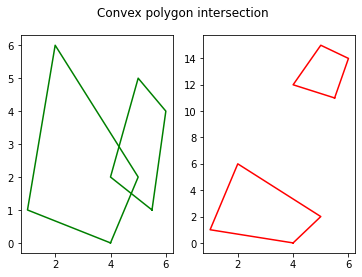

In [15]:
color_intersection = {True : "g", False : "r"}
figure, axis = plt.subplots(1, 2)
draw_chull(cpoly_1, axis[0], color_intersection[intersection_12])
draw_chull(cpoly_2, axis[0], color_intersection[intersection_12])
draw_chull(cpoly_1, axis[1], color_intersection[intersection_13])
draw_chull(cpoly_3, axis[1], color_intersection[intersection_13])
plt.suptitle("Convex polygon intersection")
plt.show()

- A green outline indicates intersection, while a red one indicates lack of intersection.

#### Usage examples

In [16]:
convex_pairs = []
num_pairs = 5
intersection = np.empty([num_pairs, num_pairs], bool)
for i in range(num_pairs):
  convex_pairs.append([])
  for j in range(num_pairs):
    cpoly_1 = cp.convex_hull_from_points(rand_cloud(1000, 0, np.random.randint(1,5)))
    cpoly_2 = cp.convex_hull_from_points(rand_cloud(1000, 0, np.random.randint(1,5)))
    intersection[i,j] = cp.do_intersect(cpoly_1, cpoly_2)
    convex_pairs[i].append([cpoly_1, cpoly_2])

- The implementation is tested for a number of random convex polygons.

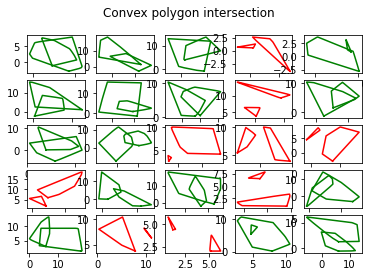

In [17]:
figure, axis = plt.subplots(num_pairs, num_pairs)
for i in range(num_pairs):
  for j in range(num_pairs):
    draw_chull(convex_pairs[i][j][0], axis[i][j], color_intersection[intersection[i][j]])
    draw_chull(convex_pairs[i][j][1], axis[i][j], color_intersection[intersection[i][j]])
plt.suptitle("Convex polygon intersection")
plt.show()

## References

- Graham, R.L. (1972). "An Efficient Algorithm for Determining the Convex Hull of a Finite Planar Set". _Information Processing Letters. 1 (4): 132–133._ [doi:10.1016/0020-0190(72)90045-2](https://www.sciencedirect.com/science/article/abs/pii/0020019072900452?via%3Dihub)
- [Hyperplane separation theorem](https://en.wikipedia.org/wiki/Hyperplane_separation_theorem).